# KMeans Clustering

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Dog Horse KMeans Challenge

In [62]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
# We picked variables that we need
X = df_dh[['height', 'weight']]
df_dh.head()

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog


1- Standardize the data

In [80]:
# Scale Data
scaler = StandardScaler()

# Fit & transform data.
scaled_df = scaler.fit_transform(X)
scaled_df

array([[-1.11490629, -0.92968047],
       [-1.11490629, -0.38479379],
       [-0.84271237, -1.55240811],
       [-0.95158993, -0.43668776],
       [-1.0604675 , -0.41074077],
       [-0.67939602, -0.48858173],
       [-0.95158993, -0.67021062],
       [-0.89715115, -1.24104429],
       [-1.16934507, -0.79994555],
       [-1.11490629, -1.00752143],
       [-0.78827358, -1.42267319],
       [-0.67939602, -1.00752143],
       [-0.67939602, -1.24104429],
       [-0.95158993, -0.41074077],
       [-1.16934507, -1.73403701],
       [-0.7338348 , -1.34483223],
       [-1.11490629, -0.38479379],
       [-1.0604675 , -0.20316489],
       [-1.11490629, -0.79994555],
       [-1.11490629, -0.3588468 ],
       [-1.11490629, -1.44862017],
       [-0.78827358, -1.31888525],
       [-0.84271237, -0.59236967],
       [-0.7338348 , -0.90373349],
       [-1.00602872, -1.52646113],
       [-0.67939602, -0.74805158],
       [-1.11490629, -0.20316489],
       [-1.11490629, -1.5783551 ],
       [-1.16934507,

2- Create an Elbow Plot to determine the number of clusters

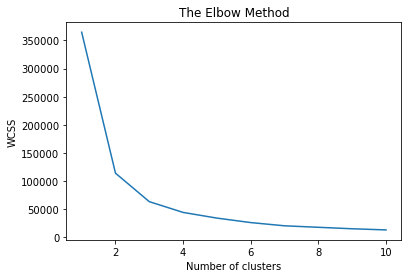

In [64]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- From the plot we can see that the optimal number of clusters in 2. 

3- Apply the K-Means Clustering model

In [65]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(scaled_df)

In [66]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]


In [67]:
# Cluster centeriods
print (kmeans.cluster_centers_)

[[ 0.96628215  0.91732732]
 [-0.74395174 -0.70626086]]


In [68]:
# assign the y_kmeans to a new column in the dataset
df_dh['kmean_prid']= y_kmeans
df_dh

,height,weight,target,type,kmean_prid
0,27.0,71.0,0.0,dog,1
1,27.0,92.0,0.0,dog,1
2,32.0,47.0,0.0,dog,1
3,30.0,90.0,0.0,dog,1
4,28.0,91.0,0.0,dog,1
...,...,...,...,...,...
195,55.0,140.0,1.0,horse,0
196,82.0,179.0,1.0,horse,0
197,46.0,132.0,1.0,horse,0
198,56.0,89.0,1.0,horse,1


In [69]:
# replace dog with 1 and horse with 0 to help us caluclate the Accuracy Score
df_dh['type'] = df_dh['type'].map({'dog': 1, 'horse': 0})

In [84]:
# we will need this to get the score of the kmean model
actualType = df_dh['type']
actualType

0      1
1      1
2      1
3      1
4      1
      ..
195    0
196    0
197    0
198    0
199    0
Name: type, Length: 200, dtype: int64

In [71]:
# Calculate the number of correct predictions
(df_dh['type'] == df_dh['kmean_prid']).value_counts()

True     187
False     13
dtype: int64

In [78]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0], dtype=int32)

4- Plot the clusters including the centroid for each of the clusters as defined by K-Means


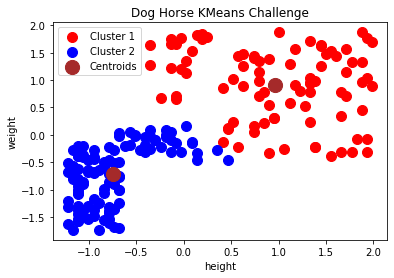

In [79]:

plt.scatter(scaled_df[y_kmeans == 0, 0],scaled_df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(scaled_df[y_kmeans == 1, 0], scaled_df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'brown', label = 'Centroids')

plt.title('Dog Horse KMeans Challenge')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.show()

5- the accuracy score if true labels are known

In [87]:
# Compute Accuracy Score of KMean Labels with True Labels

score = round(accuracy_score(y_kmeans, actualType), 4)
print('Accuracy of Kmeans :{0:f}'.format(score))

Accuracy of Kmeans :0.935000


In [90]:
# another approach could be used to the model is to split the data as usual into : 
X2 = df_dh[['height', 'weight']]
y2 = df_dh['type']

X_train, X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.20,random_state=70)

"\n\n# fit the model only to the train set: \nk_means = cluster.KMeans(n_clusters=2)\nk_means.fit(X_train)\n\nprint(k_means.labels_[:])\nprint(y_train[:])\n\nscore = metrics.accuracy_score(y_test,k_means.predict(X_test))\nprint('Accuracy:{0:f}'.format(score))\n\n"

In [92]:
# fit the model only to the train set: 
k_means2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)
k_means2.fit(X_train)

KMeans(n_clusters=2, random_state=123)

In [94]:
# the model labels: 
print(k_means2.labels_[:])
print(y_train[:])

[1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1
 1 1 0 1 1 0 0 1 1 1 0 1]
54     1
89     1
37     1
152    0
19     1
      ..
59     1
60     1
24     1
114    0
78     1
Name: type, Length: 160, dtype: int64


In [96]:
# Compute Accuracy Score of KMean Labels

score = accuracy_score(y_test,k_means2.predict(X_test))
print('Accuracy:{0:f}'.format(score))

Accuracy:0.925000


# Seattle Weather KMeans Challenge

In [144]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
X_sea = df_sea[['tmax', 'tmin']]
df_sea.head()

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [145]:
# Scale Data
scaler = StandardScaler()

# Fit & transform data.
scaled_df = scaler.fit_transform(X_sea)
scaled_df

array([[-0.66894103, -0.28273047],
       [-1.13869169, -0.95744409],
       [-1.13869169, -1.06989637],
       ...,
       [-1.06039991, -1.40725318],
       [-0.90381636, -1.18234864],
       [-0.74723281, -0.95744409]])

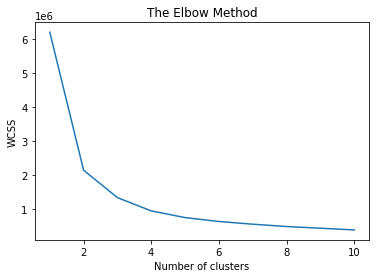

In [146]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X_sea)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the plot we can see that the optimal number of clusters in 4, but our target is 2 so we should pick 2.

In [147]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(scaled_df)

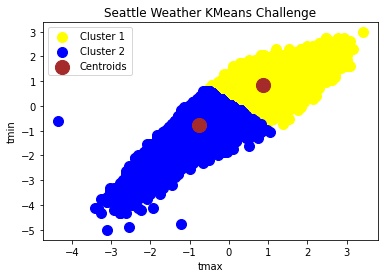

In [166]:

plt.scatter(scaled_df[y_kmeans == 0, 0],scaled_df[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')

plt.scatter(scaled_df[y_kmeans == 1, 0], scaled_df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'brown', label = 'Centroids')

plt.title('Seattle Weather KMeans Challenge')
plt.xlabel('tmax')
plt.ylabel('tmin')
plt.legend()
plt.show()

In [165]:
y_kmeans

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [150]:
# assign the y_kmeans to a new column
df_sea['kmean_prid']= y_kmeans
df_sea

,ds,prcp,tmax,tmin,rain,kmean_prid
0,1948-01-01,0.47,51,42,True,1
1,1948-01-02,0.59,45,36,True,1
2,1948-01-03,0.42,45,35,True,1
3,1948-01-04,0.31,45,34,True,1
4,1948-01-05,0.17,45,32,True,1
...,...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False,1
25547,2017-12-11,0.00,49,29,False,1
25548,2017-12-12,0.00,46,32,False,1
25549,2017-12-13,0.00,48,34,False,1


In [152]:
# replace True with 1 and False with 0 to help us caluclate the Accuracy Score
df_sea.replace({False: 0, True: 1}, inplace=True)

In [153]:
# Calculate the number of correct predictions
(df_sea['rain'] == df_sea['kmean_prid']).value_counts()

True     16266
False     9285
dtype: int64

In [162]:
df_sea.isnull().sum()
df_sea['rain'].unique()

array([ 1.,  0., nan])

In [ ]:
df_sea.dropna()

In [ ]:
actualvalues = df_sea['rain'].iloc[:10000,:]
actualvalues 

In [ ]:
# Compute Accuracy Score of KMean Labels with True Labels
score = round(accuracy_score(y_kmeans, actualvalues), 2)
print('Accuracy of Kmeans :{0:f}'.format(score))

# Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

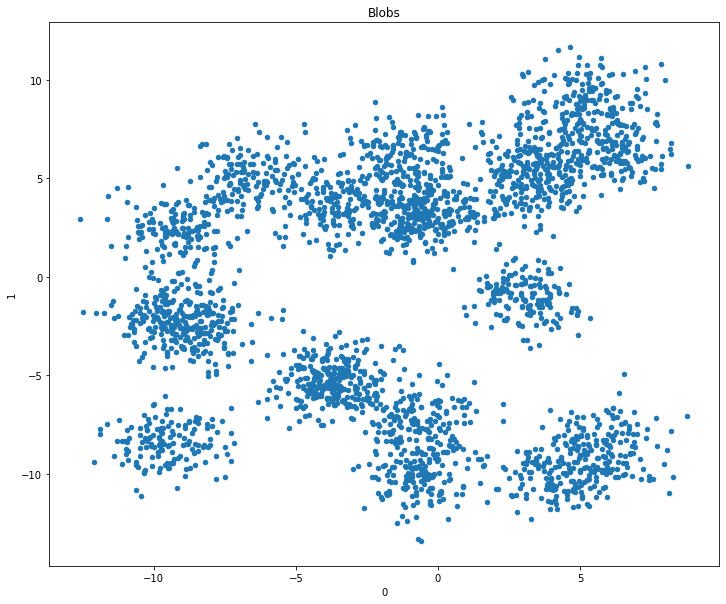

In [4]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [5]:
# Scale Data
scaler = StandardScaler()

# Fit & transform data.
scaled_df = scaler.fit_transform(df_blob)
scaled_df

array([[ 0.25620858,  1.15509398],
       [ 0.6752556 ,  0.83108941],
       [ 1.14132022,  1.41139196],
       ...,
       [ 0.16068157,  0.59358328],
       [ 1.04051272, -1.73282952],
       [ 0.99424004,  0.89753808]])

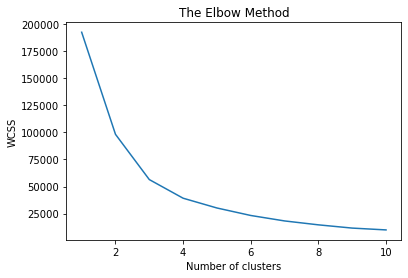

In [7]:
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(df_blob)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- From the plot we can see that the optimal number of clusters in 2. 

In [9]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(scaled_df)

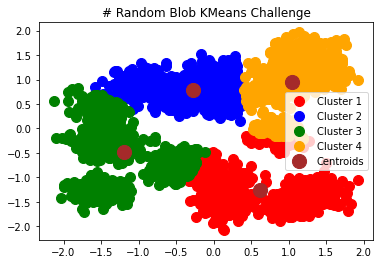

In [10]:
# Plot the clusters 
plt.scatter(scaled_df[y_kmeans == 0, 0], scaled_df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_df[y_kmeans == 1, 0], scaled_df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(scaled_df[y_kmeans == 2, 0], scaled_df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(scaled_df[y_kmeans == 3, 0], scaled_df[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'brown', label = 'Centroids')

plt.title('# Random Blob KMeans Challenge')
plt.legend()
plt.show()